## **Mini project done by K.Keerthi Sreenivas on Compound Solubility Prediction for Drug discovery** 

# **Step 1: Install rdkit ( a dependency consisting of cheminformatics related modules )**

In [95]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-10-21 18:50:18--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’

Miniconda3-py37_4.8 100%[===================>]  81.12M  73.4MB/s    in 1.1s    

2020-10-21 18:50:19 (73.4 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - \ | failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - \ | / - \ | / - \ failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ | / - \ | / - \ | / 

# **Step 2: Dowloading Delaney's Solubility Dataset from his paper**

In [96]:
! wget https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt

--2020-10-21 18:50:52--  https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt
Resolving pubs.acs.org (pubs.acs.org)... 104.18.0.20, 104.18.1.20
Connecting to pubs.acs.org (pubs.acs.org)|104.18.0.20|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt?cookieSet=1 [following]
--2020-10-21 18:50:53--  https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt?cookieSet=1
Reusing existing connection to pubs.acs.org:443.
HTTP request sent, awaiting response... 302 Found
Location: https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt [following]
--2020-10-21 18:50:53--  https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt
Reusing existing connection to pubs.acs.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 60034 (59K

**Step 2.1: Read in the data set**

In [97]:
import pandas as pd 
sol = pd.read_csv('ci034243xsi20040112_053635.txt')
sol

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


**Information given in the data:**

1.  **Column one:** Compound
2.  **Column two:** Actual Solubility
3.  **Column three:** Predicted Solubility
4.  **Column four:** SMILES ( Simplified Molecular-Input Line-Entry System) For ex: 'C' for carbon, 'Cl' for chorine , '=' Double bond etc.








# Step 3 : Examining the SMILES data 

In [98]:
sol.SMILES

0                                    ClCC(Cl)(Cl)Cl
1                                      CC(Cl)(Cl)Cl
2                                    ClC(Cl)C(Cl)Cl
3                                        ClCC(Cl)Cl
4                               FC(F)(Cl)C(F)(Cl)Cl
                           ...                     
1139                   CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140          CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141         CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O 
1142    Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O
1143                         CNC(=O)Oc1cc(C)cc(C)c1
Name: SMILES, Length: 1144, dtype: object

In [99]:
sol.SMILES[2]

'ClC(Cl)C(Cl)Cl'

**Step 3.1 : Conversion of a SMILES data string(molecule) into an rdkit object**

---



In [100]:
from rdkit import Chem  #importing Chem module from rdkit
Chem.MolFromSmiles(sol.SMILES[0]) #The rdkit object is displayed.Each rdkit object of each molecule will have a unique ID

Here, the molecule at SMILES[0] is converted into an rdkit object




In [101]:
molecule = sol.SMILES[5]
molecule

'CC(Cl)Cl'

In [102]:
molecule = Chem.MolFromSmiles(sol.SMILES[5]) #converting into an rdkit object
molecule.GetNumAtoms()


4

The number of atoms in the given molculoe SMILES[5] is displayed as 4

# **Step 4 : Calculating Molecular Descripters in rdkit**

Step 4.1 :  Creating a list of rdkit objects fromthe SMILES molecules

In [103]:
from rdkit import Chem

In [104]:
molecule_list = [Chem.MolFromSmiles(compound) for compound in sol.SMILES] 

In [105]:
len(molecule_list)

1144

In [106]:
molecule_list[:7] #displays the first 7 rdkit objects

**Step 4.2. Calculate molecular descriptors**

To predict **LogS** (log of the aqueous solubility), the study by Delaney makes use of 4 molecular descriptors:
1. **cLogP** *(Octanol-water partition coefficient)*
2. **MW** *(Molecular weight)*
3. **RB** *(Number of rotatable bonds)*
4. **AP** *(Aromatic proportion = number of aromatic atoms / total number of heavy atoms)*

Fortunately, rdkit readily computes the first 3. As for the AP descriptor, we will calculate this by manually computing the ratio of the *number of aromatic atoms* to the *total number of heavy atoms* which rdkit can compute.

**Step 4.2.1: cLogP, MW, and RB are computed**




In [107]:
import numpy as np
import pandas as pd

from rdkit.Chem import Descriptors

The **produce** function generates **descriptors cLogP, Molecular Weight, and the number of Rotatable bonds** of each unique molecule rdkit object in the list and creates **Pandas Datadrame**.

In [108]:
def produce(smiles, verbose=False):

    molecule_list = [Chem.MolFromSmiles(compound) for compound in sol.SMILES] 
    baseData = np.arange(1,1)
    i=0
     
    for molecule in molecule_list:        
       
        desc_Logp = Descriptors.MolLogP(molecule)
        desc_MolWt = Descriptors.MolWt(molecule)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(molecule)
           
        row = np.array([desc_Logp,
                        desc_MolWt,
                        desc_NumRotatableBonds])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MolLogP","MolWt","NumRotatableBonds"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [109]:
data = produce(sol.SMILES)
data.head(8) 

,MolLogP,MolWt,NumRotatableBonds
0,2.5954,167.850,0.0
1,2.3765,133.405,0.0
2,2.5938,167.850,1.0
3,2.0289,133.405,1.0
4,2.9189,187.375,1.0
5,1.8100,98.960,0.0
6,1.9352,96.944,0.0
7,1.4054,118.176,4.0


**Step 4.2.2 : Caculating the Aromatic proportion**




**Aromatic proportion = Number of Aromatic atoms / Number of Heavy atoms**

Firstly, we compute number of aromatic atoms using GetIsAromatic() Descriptor function already available in rdkit.We write a user defined function NumAromaticAtoms() 

In [110]:
comp = Chem.MolFromSmiles('Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O') #sol.SMILES(1142)

In [111]:
def NumAromaticAtoms(m):
  aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
  count = 0
  for i in aromatic_atoms:
    if i == True:
      count = count + 1
  return count


In [112]:
NumAromaticAtoms(comp) #no of aromatic atoms in comp are displayed

12

Similarly, we compute the value for entire data set

In [113]:
NumAromaticAtoms_data = [ NumAromaticAtoms(comp) for comp in molecule_list]
NumAromaticAtoms_data[30:50] # displayed from 30th to 50th compound

[6, 6, 6, 6, 6, 0, 6, 6, 0, 0, 6, 10, 6, 6, 0, 6, 6, 6, 6, 10]

Secondly, we compute the Number of Heavy Atoms using HeavyAtomCount(m) an in-bulit descriptor function.



In [114]:
comp = Chem.MolFromSmiles('Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O')
Descriptors.HeavyAtomCount(comp)

23

Similarly, we compute the value for entire data set

In [115]:
NumHeavyAtoms_data = [Descriptors.HeavyAtomCount(comp) for comp in molecule_list]
NumHeavyAtoms_data[30:50] # displayed from 30th to 50th compound

[9, 9, 9, 15, 8, 4, 8, 8, 5, 8, 8, 12, 12, 8, 6, 8, 8, 10, 8, 12]

Finally, computing Aromatic Proportion Descriptor AP = NumAromaticAtoms / NumHeavyAtoms

In [116]:
AP_data = [ NumAromaticAtoms(i)/Descriptors.HeavyAtomCount(i) for i in molecule_list]
AP_data[30:50] # displayed from 30th to 50th compound

[0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.4,
 0.75,
 0.0,
 0.75,
 0.75,
 0.0,
 0.0,
 0.75,
 0.8333333333333334,
 0.5,
 0.75,
 0.0,
 0.75,
 0.75,
 0.6,
 0.75,
 0.8333333333333334]

In [117]:
desc_AromaticProportion = pd.DataFrame(AP_data, columns=['AromaticProportion'])
desc_AromaticProportion.head(10)

,AromaticProportion
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.6
9,0.6


# **Step 4.3 : Combine the two data frames**


In [118]:
data

,MolLogP,MolWt,NumRotatableBonds
0,2.59540,167.850,0.0
1,2.37650,133.405,0.0
2,2.59380,167.850,1.0
3,2.02890,133.405,1.0
4,2.91890,187.375,1.0
...,...,...,...
1139,1.98820,287.343,8.0
1140,3.42130,286.114,2.0
1141,3.60960,308.333,4.0
1142,2.56214,354.815,3.0


In [119]:
desc_AromaticProportion

,AromaticProportion
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
1139,0.000000
1140,0.333333
1141,0.695652
1142,0.521739


In [120]:
X = pd.concat([data,desc_AromaticProportion,],axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


#**Step 4.4 Creating a dataframe dedicated to the experimental solubility from our sol dataframe**

In [121]:
sol.head(5)

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl


In [122]:
Y = sol.iloc[:,1] # Y contains only the second column from sol table
Y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: measured log(solubility:mol/L), Length: 1144, dtype: float64

## **Step 5 : Data Splitting to create training and testing sets**

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20) # Here we divide the data into 80% training set and 20% testing set

# **Step 6 : Building a Linear Regression model**

In [125]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score


In [126]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **Step 7 : Predicting X_train and X_test**

In [127]:
Y_pred_train = model.predict(X_train)  # for X_train set
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [-0.74079659 -0.0068138   0.00381806 -0.47618919]
Intercept: 0.33584415873461193
Mean squared error (MSE): 0.99
Coefficient of determination (R^2): 0.78


In [128]:
Y_pred_test = model.predict(X_test)  # for X_test set
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [-0.74079659 -0.0068138   0.00381806 -0.47618919]
Intercept: 0.33584415873461193
Mean squared error (MSE): 1.08
Coefficient of determination (R^2): 0.72


## **Step 8 : Determining our Linear Regression Equation and Predicting Solubility**

In [129]:
yintercept = '%.2f' % model.intercept_
LogP = '%.2f LogP' % model.coef_[0]
MW = '%.4f MW' % model.coef_[1]
RB = '%.4f RB' % model.coef_[2]
AP = '%.2f AP' % model.coef_[3]

In [130]:
print('LogS = ' + 
      ' ' + 
      yintercept + 
      ' ' + 
      LogP + 
      ' ' + 
      MW + 
      ' ' + 
      RB + 
      ' ' + 
      AP)

LogS =  0.34 -0.74 LogP -0.0068 MW 0.0038 RB -0.48 AP


In [131]:
df = pd.DataFrame({'Actual': Y_test ,'Predicted': Y_pred_test})
df

,Actual,Predicted
670,0.29,-0.026328
1107,-4.47,-2.527154
801,1.57,0.407538
201,-1.96,-1.790235
108,-3.66,-2.318428
...,...,...
209,-1.17,-1.397068
944,-2.33,-2.351184
134,-4.74,-2.719308
153,-2.67,-3.778687


# **Step 9 : Plotting Graphs between Experimental and Predicted Solubility values**

In [132]:
import matplotlib.pyplot as plt
Y_test.shape, Y_pred_test.shape #size of testing data

((229,), (229,))

In [133]:
Y_train.shape, Y_pred_train.shape #size of training data

((915,), (915,))

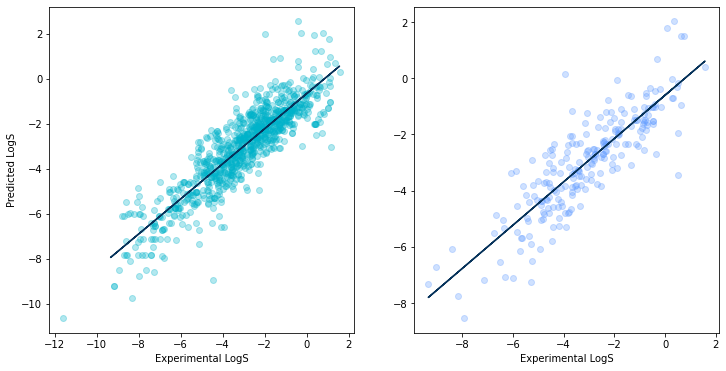

In [134]:
plt.figure(figsize=(12,6))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#00B3CA", alpha=0.3)

z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#07335B")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')  ###Using X_train

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#07335B")  

plt.xlabel('Experimental LogS')    #Using X_test

plt.savefig('plot_horizontal_logS.png')
plt.savefig('plot_horizontal_logS.pdf')
plt.show()

## **Reference**

1. John S. Delaney. [ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure](https://pubs.acs.org/doi/10.1021/ci034243x). ***J. Chem. Inf. Comput. Sci.*** 2004, 44, 3, 1000-1005.

2. Pat Walters. [Predicting Aqueous Solubility - It's Harder Than It Looks](http://practicalcheminformatics.blogspot.com/2018/09/predicting-aqueous-solubility-its.html). ***Practical Cheminformatics Blog***

3. Bharath Ramsundar, Peter Eastman, Patrick Walters, and Vijay Pande. [Deep Learning for the Life Sciences: Applying Deep Learning to Genomics, Microscopy, Drug Discovery, and More](https://learning.oreilly.com/library/view/deep-learning-for/9781492039822/), O'Reilly, 2019.

4. [Supplementary file](https://pubs.acs.org/doi/10.1021/ci034243x) from Delaney's ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure.

5. Dataprofesssor github:https://github.com/dataprofessor